# Lab semana 2: valores faltantes

## Descripción del dataset


* Revenue (Ingresos) es lo que entra.
* Profit (Ganancias) es lo que queda después de cubrir los costos.


Manos a la obra...


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lectura de datos

In [ ]:
df = pd.read_csv("./fortune_1000_2023.csv")
display(df.head())
print(df.shape)

,Rank,Company,Ticker,Sector,Industry,Profitable,Founder_is_CEO,FemaleCEO,Growth_in_Jobs,Change_in_Rank,...,CEO,Country,HeadquartersCity,HeadquartersState,Website,CompanyType,Footnote,MarketCap_Updated_M,Updated,Costs_M
0,1.0,Walmart,WMT,Retailing,General Merchandisers,yes,no,no,no,0.0,...,C. Douglas McMillon,U.S.,Bentonville,AR,www.stock.walmart.com,Public,"Figures are for fiscal year ended Jan. 31, 202...",416986.0,2023-08-02,NaN
1,2.0,Amazon,AMZN,Retailing,Internet Services and Retailing,no,no,no,no,0.0,...,Andrew R. Jassy,U.S.,Seattle,WA,www.amazon.com,Public,"Market value as of July 17, 2023.",1370373.0,2023-08-02,NaN
2,3.0,Exxon Mobil,XOM,Energy,Petroleum Refining,yes,no,no,no,3.0,...,Darren W. Woods,U.S.,Irving,TX,www.exxonmobil.com,Public,Excise taxes have been deducted. Market value ...,409878.0,2023-08-02,NaN
3,4.0,Apple,AAPL,Technology,"Computers, Office Equipment",yes,no,no,yes,-1.0,...,Timothy D. Cook,U.S.,Cupertino,CA,www.apple.com,Public,"Figures are for fiscal year ended Sept. 30, 20...",3051211.0,2023-08-02,NaN
4,5.0,UnitedHealth Group,UNH,Health Care,Health Care: Insurance and Managed Care,yes,no,no,yes,0.0,...,Andrew P. Witty,U.S.,Minnetonka,MN,www.unitedhealthgroup.com,Public,"Market value as of July 17, 2023.",450694.0,2023-08-02,NaN


(1002, 32)


## Métodos para identificar valores nulos:
1. Cuantitativo
- `isnull()`, `notnull()`,`.sum()`, `info()` .
2. Visual
- gráficos de calor (seaborn).


In [ ]:
print("\nIdentificar valores faltantes:")
print(df.notnull())
# ¿qué tal se ve?
# notnull()


Identificar valores faltantes:
       Rank  Company  Ticker  Sector  Industry  Profitable  Founder_is_CEO  \
0      True     True    True    True      True        True            True   
1      True     True    True    True      True        True            True   
2      True     True    True    True      True        True            True   
3      True     True    True    True      True        True            True   
4      True     True    True    True      True        True            True   
...     ...      ...     ...     ...       ...         ...             ...   
997    True     True    True    True      True        True            True   
998    True     True    True    True      True        True            True   
999    True     True    True    True      True        True            True   
1000  False    False   False   False     False       False           False   
1001   True     True   False   False     False       False           False   

      FemaleCEO  Growth_in_Jobs

In [ ]:
# Define a threshold for 'most' columns (e.g., 70%)
threshold = 0.7

# Calculate the number of columns in the DataFrame
num_cols = len(df.columns)

# Calculate the threshold for the number of null values
null_threshold = int(threshold * num_cols)

# Count the number of rows with null values exceeding the threshold
num_rows_mostly_null = df[(df.isnull().sum(axis=1) >= null_threshold)].shape[0]

# Print the result
print("Number of rows with mostly null values:", num_rows_mostly_null)

Number of rows with mostly null values: 2


In [ ]:
print("\nNúmero de valores faltantes por columna:")
print(df.isnull().sum()) # Una manera resumida


Número de valores faltantes por columna:
Rank                           51
Company                         1
Ticker                         43
Sector                          2
Industry                        2
Profitable                      2
Founder_is_CEO                  2
FemaleCEO                       2
Growth_in_Jobs                  9
Change_in_Rank                 73
Gained_in_Rank                 73
Dropped_in_Rank                73
Newcomer_to_the_Fortune500    502
Global500                       2
Best_Companies                  2
Number_of_employees             2
MarketCap_March31_M            43
Revenues_M                    101
RevenuePercentChange           11
Profits_M                     152
ProfitsPercentChange          136
Assets_M                        2
CEO                             3
Country                         2
HeadquartersCity                2
HeadquartersState               2
Website                         2
CompanyType                     2
Footno

In [ ]:
# ToDo: info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rank                        951 non-null    float64
 1   Company                     1001 non-null   object 
 2   Ticker                      959 non-null    object 
 3   Sector                      1000 non-null   object 
 4   Industry                    1000 non-null   object 
 5   Profitable                  1000 non-null   object 
 6   Founder_is_CEO              1000 non-null   object 
 7   FemaleCEO                   1000 non-null   object 
 8   Growth_in_Jobs              993 non-null    object 
 9   Change_in_Rank              929 non-null    float64
 10  Gained_in_Rank              929 non-null    object 
 11  Dropped_in_Rank             929 non-null    object 
 12  Newcomer_to_the_Fortune500  500 non-null    object 
 13  Global500                   1000 

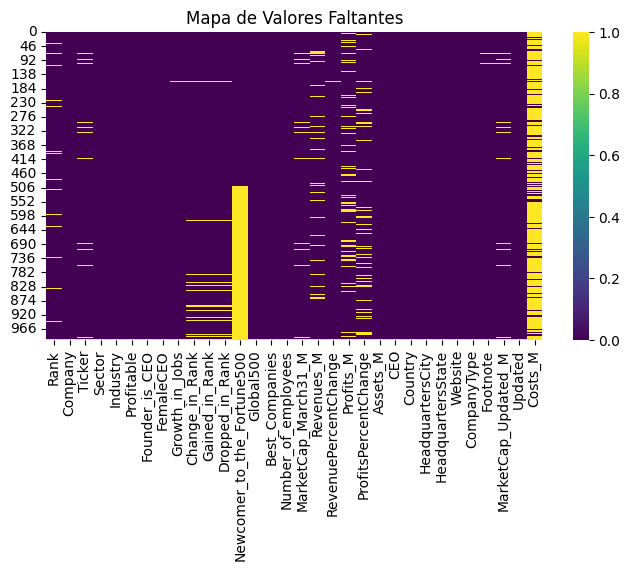

In [ ]:
# visual
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=True, cmap="viridis")
plt.title("Mapa de Valores Faltantes")
plt.show()

Responder:
1. ¿En qué país se encuentra ubicada la empresa con menor ganancia?
2. ¿Cuál es la industria con ingresos más altos? ¿Cuánto es el ingreso de ese sector?
3. ¿Qué sectores e industrias hay?¿Cuál es su promedio de ingresos?
4. ¿Cuál es el promedio de empleados para las empresas con ingresos menores al percentil 25°?

## Técnicas Básicas para Manejar Valores Nulos

a. **Eliminación:**
Cuando eliminar filas/columnas es adecuado. Pandas nos provee con el método `dropna()`.  
b. **Imputación Simple:**
Relleno con valores fijos (media, mediana, moda), `fillna()`.  
c. **Imputación Avanzada (introducción):**
Uso de interpolación `interpolate()`

In [ ]:
# a. Eliminación
print("\nEliminar filas con valores faltantes:")
print(df.dropna().shape) # fijarse en nuevas dimensiones

print("\nEliminar columnas con valores faltantes:")
print(df.dropna(axis=1).shape)


Eliminar filas con valores faltantes:
(60, 32)

Eliminar columnas con valores faltantes:
(1002, 0)


In [ ]:
# una manera más controlada
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

threshold = 0.5  # umbral 50%
# eliminar columnas que tengan al menos el 50% de valores nulos
df_dropped = df.dropna(axis=1, thresh=int(len(df) * threshold))
print(f"Hay {len(df_dropped.columns)} columnas restantes: {df_dropped.columns}")

# ToDo: elimina las filas que tengan más de un 30% de valores nulos
threshold = 0.3
df_dropped = df.dropna(axis=0, thresh=int(len(df.columns) * threshold))
print(f"Hay {len(df_dropped)} filas restantes")

Hay 30 columnas restantes: Index(['Rank', 'Company', 'Ticker', 'Sector', 'Industry', 'Profitable',
       'Founder_is_CEO', 'FemaleCEO', 'Growth_in_Jobs', 'Change_in_Rank',
       'Gained_in_Rank', 'Dropped_in_Rank', 'Global500', 'Best_Companies',
       'Number_of_employees', 'MarketCap_March31_M', 'Revenues_M',
       'RevenuePercentChange', 'Profits_M', 'ProfitsPercentChange', 'Assets_M',
       'CEO', 'Country', 'HeadquartersCity', 'HeadquartersState', 'Website',
       'CompanyType', 'Footnote', 'MarketCap_Updated_M', 'Updated'],
      dtype='object')
Hay 1000 filas restantes


**1. ¿En qué país se encuentra ubicada la empresa con menor ganancia?**

In [ ]:
# ¿qué columna(s) usar?
# ¿tenemos algún problema con los datos?
display(df.Profits_M.info())
profit_null_rows = df[df['Profits_M'].isnull()]
profit_null_rows.describe()
# ¿hay alguna otra columna con nulos?

<class 'pandas.core.series.Series'>
RangeIndex: 1002 entries, 0 to 1001
Series name: Profits_M
Non-Null Count  Dtype  
--------------  -----  
850 non-null    float64
dtypes: float64(1)
memory usage: 8.0 KB


None

,Rank,Change_in_Rank,Number_of_employees,MarketCap_March31_M,Revenues_M,RevenuePercentChange,Profits_M,ProfitsPercentChange,Assets_M,MarketCap_Updated_M,Costs_M
count,145.000000,142.000000,150.000000,144.000000,137.000000,150.000000,0.0,130.000000,1.500000e+02,144.000000,29.000000
mean,501.462069,-4.697183,31205.060000,26686.145833,21081.576642,17.767333,NaN,-38.735385,8.364469e+04,26906.305556,22038.137931
std,289.716792,68.627682,54924.394988,49256.307137,42071.822696,33.416335,NaN,244.175605,4.067234e+05,50733.836069,41687.654326
min,6.000000,-302.000000,0.000000,96.000000,2426.000000,-49.500000,NaN,-2400.500000,3.840000e+02,96.000000,927.000000
25%,265.000000,-29.750000,6244.250000,4018.750000,4140.000000,2.500000,NaN,-49.375000,5.290500e+03,4018.750000,3544.000000
50%,515.000000,-9.000000,12991.000000,8834.500000,7507.000000,11.050000,NaN,-8.950000,1.228200e+04,8834.500000,8264.000000
75%,735.000000,15.000000,31041.250000,23874.000000,17227.000000,22.775000,NaN,29.300000,2.929650e+04,24051.750000,16000.000000
max,1002.000000,334.000000,402000.000000,311093.000000,322467.000000,215.700000,NaN,320.500000,4.305288e+06,322698.000000,210787.000000


In [ ]:
# revisar relacion con Country
df.groupby('Country')["Profits_M"].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
U.S.,850.0,1813.801176,6174.159562,-22819.0,189.0,600.5,1487.25,99803.0


Respuesta: sólo hay un país en el dataset, por lo tanto, la empresa con menos ganancias debe de estar en EEUU.

Entonces, ¿cuánto de ganancias tiene el percentil 25°?

In [ ]:
# imputar con media
df_imputed = df.copy()
df_imputed['Profits_M'] = df_imputed['Profits_M'].fillna(df_imputed['Profits_M'].mean())
print("Resultados imputando con promedio:")
display(df_imputed.groupby('Country')["Profits_M"].describe())
# imputar con mediana
df_imputed = df.copy()
df_imputed['Profits_M'] = df_imputed['Profits_M'].fillna(df_imputed['Profits_M'].median())
print("Resultados imputando con mediana:")
display(df_imputed.groupby('Country')["Profits_M"].describe())

Resultados imputando con promedio:


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
U.S.,1000.0,1813.801176,5691.791071,-22819.0,245.75,849.0,1813.801176,99803.0


Resultados imputando con mediana:


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
U.S.,1000.0,1631.806,5708.271734,-22819.0,245.75,600.5,1280.75,99803.0


Respuesta: 245.75 M

**2. ¿Cuál es la industria con ingresos más altos? ¿Cuánto es el ingreso de esta industria?**

In [ ]:
# inspeccionamos nuevamente los registros donde hay nulos
revenue_null_rows = df[df['Revenues_M'].isnull()]
revenue_null_rows.info()
# ¿Hay alguna columna con la que se pueda relacionar Revenues_M?

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 10 to 1001
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rank                        97 non-null     float64
 1   Company                     100 non-null    object 
 2   Ticker                      93 non-null     object 
 3   Sector                      99 non-null     object 
 4   Industry                    99 non-null     object 
 5   Profitable                  99 non-null     object 
 6   Founder_is_CEO              99 non-null     object 
 7   FemaleCEO                   99 non-null     object 
 8   Growth_in_Jobs              98 non-null     object 
 9   Change_in_Rank              90 non-null     float64
 10  Gained_in_Rank              90 non-null     object 
 11  Dropped_in_Rank             90 non-null     object 
 12  Newcomer_to_the_Fortune500  48 non-null     object 
 13  Global500                   99 non-nul

In [ ]:
# eliminar filas donde ganancias e ingresos sean nulos a la vez
df_revenue_imputed = df.dropna(how="all", subset=['Profits_M', 'Revenues_M'])
print(df_revenue_imputed.shape)
# ToDo: ¿cuántos registros perdimos?
diff = df.shape[0] - df_revenue_imputed.shape[0]
print(f"Perdimos {diff} registros, que equivale a {round(diff/df.shape[0]*100,2)}% del dataset original")
# ToDo: ¿cuántos nulos quedan en Revenues_M?
print(df_revenue_imputed["Revenues_M"].isnull().sum())

(987, 32)
Perdimos 15 registros, que equivale a 1.5% del dataset original
86


Correlación             Revenues_M  Profits_M
Revenues_M        1.00       0.55
Profits_M         0.55       1.00


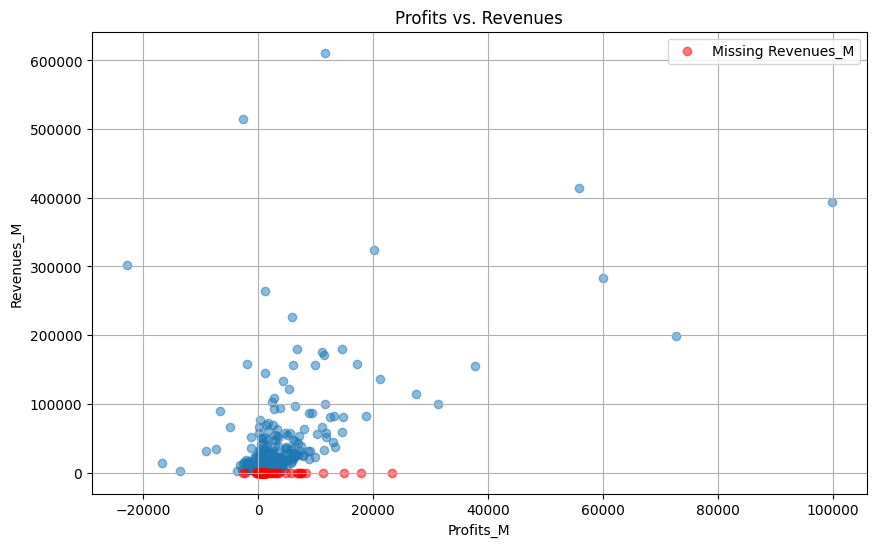

In [ ]:
# Paso 1: relación entre ganacias e ingresos
# correlación
correlation = df_revenue_imputed[['Revenues_M', 'Profits_M']].corr()
print(f"Correlación {round(correlation,2)}")

# visualizar profits vs revenues
plt.figure(figsize=(10, 6))
plt.scatter(df_revenue_imputed['Profits_M'], df_revenue_imputed['Revenues_M'], alpha=0.5)
plt.scatter(df_revenue_imputed['Profits_M'][df_revenue_imputed['Revenues_M'].isna()], [1]*sum(df_revenue_imputed['Revenues_M'].isna()), color='red', alpha=0.5, label='Missing Revenues_M')
plt.title('Profits vs. Revenues')
plt.xlabel('Profits_M')
plt.ylabel('Revenues_M')
plt.legend()
plt.grid()
plt.show()

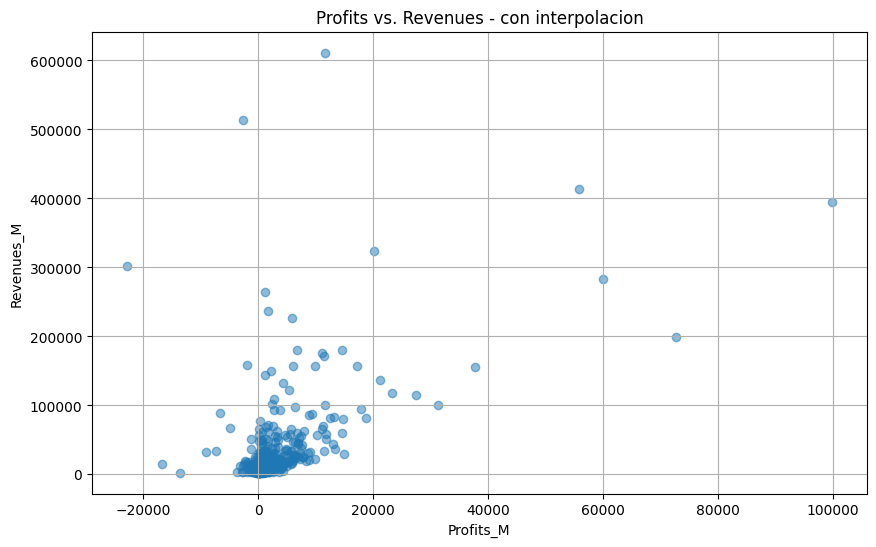

In [ ]:
# Paso 2: interpolar ingresos basados en ganancias
# ordenar por ganancias para que la interpolación sea signficativa
df_revenue_imputed = df_revenue_imputed.sort_values(by='Profits_M')
df_revenue_imputed['Revenues_M'] = df['Revenues_M'].interpolate(method='linear')

# visualizar profits vs revenues
plt.figure(figsize=(10, 6))
plt.scatter(df_revenue_imputed['Profits_M'], df_revenue_imputed['Revenues_M'], alpha=0.5)
plt.title('Profits vs. Revenues - con interpolacion')
plt.xlabel('Profits_M')
plt.ylabel('Revenues_M')
plt.grid()
plt.show()

In [ ]:
# vamos a ver estadísticas por industria
display(df_revenue_imputed.groupby('Industry')[["Profits_M","Revenues_M"]].mean())

,Profits_M,Revenues_M
Industry,,
"Advertising, marketing",194.250000,6875.066667
Aerospace & Defense,902.357143,21909.218750
Airlines,224.555556,20089.650000
Apparel,843.769231,8004.875000
"Automotive Retailing, Services",1119.833333,16690.083333
...,...,...
Waste Management,1379.333333,10270.250000
Wholesalers: Diversified,612.368421,9314.944444
Wholesalers: Electronics and Office Equipment,589.600000,25969.300000


Respuesta: General Merchandisers, con un promedio de ingresos de 115 M

**3.¿Qué sectores e industrias hay? ¿Cuál es su promedio de ingresos?**

In [ ]:
df.describe(include='object')
# df[["Sector", "Industry"]].describe()

,Company,Ticker,Sector,Industry,Profitable,Founder_is_CEO,FemaleCEO,Growth_in_Jobs,Gained_in_Rank,Dropped_in_Rank,...,Global500,Best_Companies,CEO,Country,HeadquartersCity,HeadquartersState,Website,CompanyType,Footnote,Updated
count,1001,959,1000,1000,1000,1000,1000,993,929,929,...,1000,1000,999,1000,1000,1000,1000,1000,991,1000
unique,1001,959,22,74,2,2,2,2,2,2,...,2,2,999,1,389,45,1000,2,116,2
top,Walmart,WMT,Financials,Utilities: Gas and Electric,yes,no,no,yes,no,yes,...,no,no,C. Douglas McMillon,U.S.,New York,CA,www.stock.walmart.com,Public,"Market value as of March 31, 2023.",2023-06-05
freq,1,1,150,37,859,943,916,708,516,508,...,878,957,1,1000,65,123,1,956,538,866


In [ ]:
# estadísticas por sector e industria - sin tratamiento de nulos
df.groupby(["Sector","Industry"])["Profits_M"].describe()

count  \
Sector         Industry                                               
-              Advertising, marketing                           1.0   
               Aerospace & Defense                              2.0   
               Airlines                                         1.0   
               Apparel                                          1.0   
               Automotive Retailing, Services                   1.0   
...                                                             ...   
Transportation Transportation and Logistics                     7.0   
               Trucking, Truck Leasing                          8.0   
Wholesalers    Wholesalers: Diversified                        16.0   
               Wholesalers: Electronics and Office Equipment    4.0   
               Wholesalers: Food and Grocery                    5.0   

                                                                    mean  \
Sector         Industry                                                    
-              Advertising, marketing                         -97.000000   
               Aerospace & Defense                            827.500000   
               Airlines                                      -554.000000   
               Apparel                                       -188.000000   
               Automotive Retailing, Services                  89.000000   
...                                                                  ...   
Transportation Transportation and Logistics                   618.857143   
               Trucking, Truck Leasing                        642.750000   
Wholesalers    Wholesalers: Diversified                       576.750000   
               Wholesalers: Electronics and Office Equipment  714.750000   
               Wholesalers: Food and Grocery                  387.000000   

                                                                     std  \
Sector         Industry                                                    
-              Advertising, marketing                                NaN   
               Aerospace & Defense                             54.447222   
               Airlines                                              NaN   
               Apparel                                               NaN   
               Automotive Retailing, Services                        NaN   
...                                                                  ...   
Transportation Transportation and Logistics                   406.684738   
               Trucking, Truck Leasing                        493.934278   
Wholesalers    Wholesalers: Diversified                       366.726510   
               Wholesalers: Electronics and Office Equipment  548.769760   
               Wholesalers: Food and Grocery                  554.926572   

                                                                min     25%  \
Sector         Industry                                                       
-              Advertising, marketing                         -97.0  -97.00   
               Aerospace & Defense                            789.0  808.25   
               Airlines                                      -554.0 -554.00   
               Apparel                                       -188.0 -188.00   
               Automotive Retailing, Services                  89.0   89.00   
...                                                             ...     ...   
Transportation Transportation and Logistics                   197.0  356.50   
               Trucking, Truck Leasing                         22.0  290.75   
Wholesalers    Wholesalers: Diversified                       133.0  339.50   
               Wholesalers: Electronics and Office Equipment   89.0  510.50   
               Wholesalers: Food and Grocery                   28.0   35.00   

                                                                50%      75%  \
Sector         Industry                             

In [ ]:
# idea: rellenar con el valor más popular (es decir ...)

def get_mode(x):
  """Calculates the mode of a pandas Series.

  Args:
      x: A pandas Series.

  Returns:
      The mode of the Series. In case of multiple modes, the first one is returned.
  """
  return x.mode()[0]

display(df.groupby("Industry")["Sector"].agg(get_mode).reset_index())

,Industry,Sector
0,"Advertising, marketing",Business Services
1,Aerospace & Defense,Aerospace & Defense
2,Airlines,Transportation
3,Apparel,Apparel
4,"Automotive Retailing, Services",Retailing
...,...,...
69,Waste Management,Business Services
70,Wholesalers: Diversified,Wholesalers
71,Wholesalers: Electronics and Office Equipment,Wholesalers
72,Wholesalers: Food and Grocery,Wholesalers


In [ ]:
# ToDo: imputar los sectores nulos
df_sectors_map = df.groupby("Industry")["Sector"].agg(get_mode).reset_index()

# al unir los dataframes, pandas renombra a las columnas que tienen nombres iguales
# se agrega sufijo "_x" a las de la tabla izquierda
# y "_y" a las de la derecha
df_sectors_imputed = df.merge(df_sectors_map, on="Industry", how="left").drop("Sector_x",axis=1).rename(columns={"Sector_y":"Sector"})
display(df_sectors_imputed.groupby(["Sector","Industry"])["Revenues_M"].describe())

count  \
Sector              Industry                                               
Aerospace & Defense Aerospace & Defense                             14.0   
Apparel             Apparel                                         15.0   
Business Services   Advertising, marketing                           3.0   
                    Diversified Outsourcing Services                14.0   
                    Equipment Leasing                                2.0   
...                                                                  ...   
Transportation      Transportation and Logistics                     8.0   
                    Trucking, Truck Leasing                          9.0   
Wholesalers         Wholesalers: Diversified                        17.0   
                    Wholesalers: Electronics and Office Equipment    4.0   
                    Wholesalers: Food and Grocery                    6.0   

                                                                           mean  \
Sector              Industry                                                      
Aerospace & Defense Aerospace & Defense                            20108.714286   
Apparel             Apparel                                         8323.600000   
Business Services   Advertising, marketing                          3073.000000   
                    Diversified Outsourcing Services                6349.357143   
                    Equipment Leasing                               7190.500000   
...                                                                         ...   
Transportation      Transportation and Logistics                   10873.000000   
                    Trucking, Truck Leasing                         6481.555556   
Wholesalers         Wholesalers: Diversified                        9734.176471   
                    Wholesalers: Electronics and Office Equipment  17022.500000   
                    Wholesalers: Food and Grocery                  31845.166667   

                                                                            std  \
Sector              Industry                                                      
Aerospace & Defense Aerospace & Defense                            23016.647916   
Apparel             Apparel                                        10931.768866   
Business Services   Advertising, marketing                           852.413632   
                    Diversified Outsourcing Services                4573.154956   
                    Equipment Leasing                               6295.371673   
...                                                                         ...   
Transportation      Transportation and Logistics                    6898.467842   
                    Trucking, Truck Leasing                         3509.144130   
Wholesalers         Wholesalers: Diversified                        6126.398771   
                    Wholesalers: Electronics and Office Equipment  16657.136579   
                    Wholesalers: Food and Grocery                  24289.956537   

                                                                      min  \
Sector              Industry                                                
Aerospace & Defense Aerospace & Defense                            2557.0   
Apparel             Apparel                                        2631.0   
Business Services   Advertising, marketing                         2481.0   
                    Diversified Outsourcing Services               2644.0   
                    Equipment Leasing                              2739.0   
...                                                                   ...   
Transportation      Transportation and Logistics                   4549.0   
                    Trucking, Truck Leasing                        2792.0   
Wholesalers         Wholesalers: Diversified                       3363.0   
                    Wholesalers: Electronics and Office Equipment  3125

**4. ¿Cuál es el promedio de empleados para las empresas con ingresos menores al percentil 25°?**

In [ ]:
# inspeccionar los datos pertinentes
display(df_revenue_imputed.Number_of_employees.describe())
# ¿qué valores extremos hay?

,Number_of_employees
count,9.870000e+02
mean,3.634862e+04
std,1.005225e+05
min,0.000000e+00
25%,6.325000e+03
50%,1.400000e+04
75%,3.102000e+04
max,2.100000e+06


6325.0

In [ ]:
# estos nulos, dónde se encuentran
# quizás no son los registros que pertenecen al percentil 25
print(df_revenue_imputed[(df_revenue_imputed.Number_of_employees==0) & (df_revenue_imputed.Revenues_M < df.Revenues_M.quantile(.25))].shape)
print(df_revenue_imputed[df_revenue_imputed.Revenues_M < df_revenue_imputed.Revenues_M.quantile(.25)].shape)


(45, 32)
(225, 32)


In [ ]:
# ToDo: ¿los nulos equivalen a qué porcentaje de los datos?
45*100/225

20.0

In [ ]:
# Sin imputar
df_revenue_imputed[df_revenue_imputed.Revenues_M < df_revenue_imputed.Revenues_M.quantile(.25)].describe()

,Rank,Change_in_Rank,Number_of_employees,MarketCap_March31_M,Revenues_M,RevenuePercentChange,Profits_M,ProfitsPercentChange,Assets_M,MarketCap_Updated_M,Costs_M
count,216.000000,179.000000,225.000000,220.00000,225.000000,224.000000,196.000000,176.000000,225.000000,221.000000,35.000000
mean,877.814815,-13.346369,7691.506667,7140.10000,3129.093333,26.601786,183.566327,80.826705,9125.688889,7138.556561,3012.285714
std,72.959581,72.180195,9924.353729,8895.73115,461.987047,71.976554,1194.827197,769.227008,15966.480207,8875.520211,798.169066
min,751.000000,-310.000000,0.000000,12.00000,2407.000000,-41.600000,-13660.000000,-643.800000,384.000000,12.000000,2021.000000
25%,815.250000,-50.000000,882.000000,1758.00000,2707.000000,3.700000,46.000000,-34.875000,2662.000000,1758.000000,2436.500000
50%,879.500000,-18.000000,5820.000000,4182.50000,3097.000000,13.050000,235.500000,0.350000,4446.000000,4183.000000,2974.000000
75%,940.500000,20.500000,10779.000000,7948.75000,3548.000000,31.450000,463.750000,42.900000,7415.000000,7924.000000,3274.000000
max,1000.000000,206.000000,73000.000000,57398.00000,3933.000000,981.600000,3675.000000,9544.200000,110364.000000,57398.000000,6430.000000


In [ ]:
# Imputando
# fijarse en la función usada
df_employees_imputed = df_revenue_imputed.copy()
df_employees_imputed['Number_of_employees'] = df_employees_imputed['Number_of_employees'].replace(0, df_revenue_imputed.Number_of_employees.median())
df_employees_imputed[df_employees_imputed.Revenues_M < df_revenue_imputed.Revenues_M.quantile(.25)].describe()


,Rank,Change_in_Rank,Number_of_employees,MarketCap_March31_M,Revenues_M,RevenuePercentChange,Profits_M,ProfitsPercentChange,Assets_M,MarketCap_Updated_M,Costs_M
count,216.000000,179.000000,225.000000,220.00000,225.000000,224.000000,196.000000,176.000000,225.000000,221.000000,35.000000
mean,877.814815,-13.346369,10491.506667,7140.10000,3129.093333,26.601786,183.566327,80.826705,9125.688889,7138.556561,3012.285714
std,72.959581,72.180195,9312.790771,8895.73115,461.987047,71.976554,1194.827197,769.227008,15966.480207,8875.520211,798.169066
min,751.000000,-310.000000,161.000000,12.00000,2407.000000,-41.600000,-13660.000000,-643.800000,384.000000,12.000000,2021.000000
25%,815.250000,-50.000000,4300.000000,1758.00000,2707.000000,3.700000,46.000000,-34.875000,2662.000000,1758.000000,2436.500000
50%,879.500000,-18.000000,9450.000000,4182.50000,3097.000000,13.050000,235.500000,0.350000,4446.000000,4183.000000,2974.000000
75%,940.500000,20.500000,14000.000000,7948.75000,3548.000000,31.450000,463.750000,42.900000,7415.000000,7924.000000,3274.000000
max,1000.000000,206.000000,73000.000000,57398.00000,3933.000000,981.600000,3675.000000,9544.200000,110364.000000,57398.000000,6430.000000


¿Qué impacto tiene el método de imputación?
¿Cómo se justifica?